In [58]:
"""A Mini Project Work Done By -- Team A Evoastra Ventures Pvt. Ltd."""

'A Mini Project Work Done By -- Team A Evoastra Ventures Pvt. Ltd.'

In [59]:
# Complete RemoteOK Job Analysis Project
# This notebook combines web scraping, data analysis, and visualization
# Author: Team A
# Date: Jan 2026

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
import random
import os
import re
import warnings
warnings.filterwarnings('ignore')

# For visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [60]:
#The code is Partially Written By Our Team and Partially written by AI Tools

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import os
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class RemoteOKScraperReal:
    """
    Real-time web scraper for RemoteOK.com with enhanced anti-blocking techniques.
    """
    def __init__(self):
        self.base_url = "https://remoteok.com"
        self.jobs_data = []
        
        # Rotating user agents to avoid detection
        self.user_agents = [
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15",
            "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/121.0",
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.6045.160 Safari/537.36"
        ]
        
        # Different endpoints to try
        self.endpoints = [
            "/",
            "/remote-jobs",
            "/remote-dev-jobs",
            "/remote-python-jobs",
            "/remote-jobs?tags=python",
            "/remote-jobs?tags=javascript"
        ]

    def get_random_headers(self):
        """Generate random headers for each request"""
        return {
            "User-Agent": random.choice(self.user_agents),
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
            "Accept-Language": "en-US,en;q=0.5",
            "Accept-Encoding": "gzip, deflate, br",
            "Connection": "keep-alive",
            "Upgrade-Insecure-Requests": "1",
            "Sec-Fetch-Dest": "document",
            "Sec-Fetch-Mode": "navigate",
            "Sec-Fetch-Site": "none",
            "Sec-Fetch-User": "?1",
            "Cache-Control": "max-age=0",
            "Referer": "https://www.google.com/"
        }

    def fetch_with_retry(self, endpoint, max_retries=3):
        """Fetch page with retry logic and delays"""
        url = f"{self.base_url}{endpoint}"
        
        for attempt in range(max_retries):
            try:
                print(f"🔗 Attempt {attempt + 1}/{max_retries}: Fetching {url}")
                
                # Adding random delay between requests
                if attempt > 0:
                    delay = random.uniform(2, 5)
                    print(f"   ⏳ Waiting {delay:.1f} seconds...")
                    time.sleep(delay)
                
                headers = self.get_random_headers()
                session = requests.Session()
                
                # Add cookies to appear more human-like
                session.headers.update(headers)
                
                response = session.get(url, timeout=15)
                response.raise_for_status()
                
                # Checking if we got a valid response (not a blocking page)
                if "Cloudflare" in response.text or "captcha" in response.text.lower():
                    print("   ⚠️  Cloudflare protection detected")
                    continue
                
                if len(response.text) < 10000:  # Too small, likely blocked
                    print("   ⚠️  Response too small, likely blocked")
                    continue
                
                print(f"   ✅ Success! Response size: {len(response.text)} characters")
                return response.content
                
            except requests.exceptions.RequestException as e:
                print(f"   ❌ Request failed: {e}")
                continue
        
        return None

    def try_multiple_endpoints(self):
        """Try multiple endpoints to find one that works"""
        print("\n🔄 Trying different RemoteOK endpoints...")
        
        for endpoint in self.endpoints:
            print(f"\nTrying endpoint: {endpoint}")
            content = self.fetch_with_retry(endpoint)
            
            if content:
                success = self.parse_jobs(content)
                if success and len(self.jobs_data) >= 10:  # Got enough jobs
                    print(f"✅ Successfully scraped from {endpoint}")
                    return True
        
        return False

    def parse_jobs(self, html_content):
        """Parse job listings from HTML content"""
        try:
            soup = BeautifulSoup(html_content, 'html.parser')
            
            # Try different selectors (RemoteOK changes their structure)
            job_selectors = [
                'tr.job',
                'table#jobsboard tr.job',
                'div.job-container',
                'div[data-job]'
            ]
            
            job_rows = None
            for selector in job_selectors:
                job_rows = soup.select(selector)
                if job_rows:
                    print(f"   Found {len(job_rows)} jobs using selector: {selector}")
                    break
            
            if not job_rows:
                print("   ❌ Could not find job listings with any selector")
                # Debug: Save HTML for inspection
                with open("debug_page.html", "w", encoding="utf-8") as f:
                    f.write(soup.prettify())
                print("   💾 Saved page HTML to debug_page.html for inspection")
                return False

            print(f"📊 Found {len(job_rows)} job listings to parse")

            for row in job_rows:
                try:
                    # Extract job data
                    job_info = self.extract_job_info(row)
                    if job_info and job_info['title'] != "N/A":
                        self.jobs_data.append(job_info)
                        
                except Exception as e:
                    print(f"   ⚠️  Error parsing job row: {e}")
                    continue
            
            print(f"   ✅ Successfully parsed {len(self.jobs_data)} jobs")
            return len(self.jobs_data) > 0
            
        except Exception as e:
            print(f"❌ Error in parse_jobs: {e}")
            return False

    def extract_job_info(self, row):
        """Extract information from a single job row"""
        # Method 1: Try to get data from attributes
        job_data = {
            'title': row.get('data-search', 'N/A') or row.get('data-position', 'N/A'),
            'company': row.get('data-company', 'N/A'),
            'skills': '',
            'location': 'Remote',
            'job_type': 'Full-Time',
            'salary': 'N/A',
            'date_posted': datetime.now().strftime("%Y-%m-%d")
        }
        
        # Method 2: Extract from HTML elements
        # Title
        if job_data['title'] == 'N/A':
            title_elem = row.find('h2') or row.find('a', class_='preventLink')
            if title_elem:
                job_data['title'] = title_elem.get_text(strip=True)
        
        # Company
        if job_data['company'] == 'N/A':
            company_elem = row.find('h3') or row.find('span', class_='companyLink')
            if company_elem:
                job_data['company'] = company_elem.get_text(strip=True)
        
        # Skills/Tags
        tags = row.find_all(['div', 'span'], class_=re.compile(r'tag|skill|tech'))
        if not tags:
            tags = row.find_all('td', class_='tags')
            
        skills_list = []
        for tag in tags:
            skill = tag.get_text(strip=True)
            if skill and len(skill) < 50:  # Filter out long text
                skills_list.append(skill)
        
        job_data['skills'] = ', '.join(skills_list[:10])  # Limit to 10 skills
        
        # Location, Salary, Job Type
        location_divs = row.find_all('div', class_='location') or row.find_all('td', class_='location')
        for div in location_divs:
            text = div.get_text(strip=True)
            if not text:
                continue
                
            # Check for salary indicators
            if any(indicator in text.lower() for indicator in ['$', '€', '£', '💰', 'salary', 'pay']):
                job_data['salary'] = text
            # Check for job type
            elif any(job_type in text.lower() for job_type in ['full-time', 'contract', 'part-time', 'freelance']):
                job_data['job_type'] = text.title()
            # Assume it's location if not salary or job type
            elif 'remote' not in text.lower():
                job_data['location'] = text
        
        return job_data

    def scrape_with_proxies(self):
        """Alternative method using free proxies (if available)"""
        print("\n🔧 Trying proxy method...")
        
        # List of free proxies (these might not work, just an example)
        proxies = [
            'http://138.197.157.32:3128',
            'http://165.227.36.191:3128',
            'http://167.99.77.52:3128'
        ]
        
        for proxy in proxies:
            try:
                print(f"   Trying proxy: {proxy}")
                response = requests.get(
                    self.base_url,
                    proxies={'http': proxy, 'https': proxy},
                    headers=self.get_random_headers(),
                    timeout=10
                )
                
                if response.status_code == 200:
                    return self.parse_jobs(response.content)
                    
            except:
                continue
        
        return False

    def save_to_csv(self, filename="remoteok_jobs_real.csv"):
        """Save scraped data to CSV file"""
        if not self.jobs_data:
            print("❌ No data to save!")
            return None
            
        df = pd.DataFrame(self.jobs_data)
        
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(filename) if os.path.dirname(filename) else '.', exist_ok=True)
        
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f"💾 Successfully saved {len(self.jobs_data)} REAL job records to {filename}")
        return df

    def run(self):
        """
        Main method to run the scraper.
        Returns DataFrame if successful, None if failed.
        """
        print("="*70)
        print("🚀 REMOTEOK REAL-TIME JOB SCRAPER (NO FAIL-SAFE)")
        print("="*70)
        print("Note: This scraper will only return REAL data or fail.")
        print("      No fake data will be generated.")
        print("="*70)
        
        # Method 1: Try multiple endpoints
        print("\n📡 METHOD 1: Trying multiple endpoints...")
        success = self.try_multiple_endpoints()
        
        # Method 2: Trying different parsing strategies
        if not success or len(self.jobs_data) < 5:
            print("\n📡 METHOD 2: Trying alternative parsing...")
            # Try direct API call if available
            success = self.try_api_call()
        
        # Method 3: Try with proxies 
        if not success or len(self.jobs_data) < 5:
            print("\n📡 METHOD 3: Trying with proxies...")
            success = self.scrape_with_proxies()
        
        if success and len(self.jobs_data) >= 5:
            df = self.save_to_csv()
            
            print("\n" + "="*70)
            print("🎉 SUCCESS! REAL DATA COLLECTED")
            print("="*70)
            print(f"✅ Total jobs collected: {len(self.jobs_data)}")
            print(f"✅ Unique companies: {df['company'].nunique()}")
            print(f"✅ Unique job titles: {df['title'].nunique()}")
            print(f"✅ Date collected: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            print("="*70)
            
            return df
        else:
            print("\n" + "="*70)
            print("❌ SCRAPING FAILED - NO DATA COLLECTED")
            print("="*70)
            print("Possible reasons:")
            print("1. RemoteOK.com is blocking scraping attempts")
            print("2. The website structure has changed")
            print("3. IP address is temporarily blocked")
            print("\nSolutions to try:")
            print("1. Try again later (wait 1-2 hours)")
            print("2. Use a VPN to change your IP address")
            print("3. Run this on a different network")
            print("4. Use the alternative scraper below")
            print("="*70)
            
            return None

    def try_api_call(self):
        """
        Try to find and use RemoteOK's API if available
        Many websites have hidden APIs that are easier to access
        """
        print("   Looking for API endpoints...")
        
        # Common API patterns
        api_patterns = [
            "/api",
            "/jobs.json",
            "/positions.json",
            "/data/jobs",
            "/remote-jobs.json"
        ]
        
        for pattern in api_patterns:
            url = f"{self.base_url}{pattern}"
            try:
                print(f"   Trying API: {url}")
                response = requests.get(url, headers=self.get_random_headers(), timeout=10)
                
                if response.status_code == 200:
                    try:
                        # Try to parse as JSON
                        data = response.json()
                        if isinstance(data, list) and len(data) > 0:
                            return self.parse_api_data(data)
                    except:
                        # Not JSON, try as text
                        return self.parse_jobs(response.content)
                        
            except:
                continue
        
        return False

    def parse_api_data(self, data):
        """Parse data from API response"""
        try:
            for job in data:
                if isinstance(job, dict):
                    self.jobs_data.append({
                        'title': job.get('position', job.get('title', 'N/A')),
                        'company': job.get('company', 'N/A'),
                        'skills': ', '.join(job.get('tags', [])) if isinstance(job.get('tags', []), list) else str(job.get('tags', '')),
                        'location': job.get('location', 'Remote'),
                        'job_type': job.get('job_type', job.get('type', 'Full-Time')),
                        'salary': job.get('salary', job.get('pay', 'N/A')),
                        'date_posted': job.get('date', datetime.now().strftime("%Y-%m-%d"))
                    })
            
            print(f"   ✅ Parsed {len(self.jobs_data)} jobs from API")
            return len(self.jobs_data) > 0
            
        except Exception as e:
            print(f"   ❌ Error parsing API data: {e}")
            return False


# ============================================================================
# ALTERNATIVE REAL DATA SOURCE - If RemoteOK is completely blocked
# ============================================================================

class AlternativeJobScraper:
    """
    Alternative scraper that uses different websites for real job data
    """
    def __init__(self):
        self.jobs_data = []
    
    def scrape_remote_co(self):
        """Scrape from remote.co (usually more accessible)"""
        print("🌐 Trying remote.co...")
        try:
            url = "https://remote.co/remote-jobs/developer/"
            headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
            }
            
            response = requests.get(url, headers=headers, timeout=15)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
                
                # Find job listings on remote.co
                job_cards = soup.find_all('div', class_='card-body')
                
                for card in job_cards[:30]:  # Limit to 30 jobs
                    title_elem = card.find('span', class_='font-weight-bold')
                    company_elem = card.find('p', class_='m-0')
                    
                    if title_elem:
                        self.jobs_data.append({
                            'title': title_elem.get_text(strip=True),
                            'company': company_elem.get_text(strip=True) if company_elem else 'N/A',
                            'skills': self.extract_skills(card),
                            'location': 'Remote',
                            'job_type': 'Full-Time',
                            'salary': 'N/A',
                            'date_posted': datetime.now().strftime("%Y-%m-%d")
                        })
                
                return len(self.jobs_data) > 0
                
        except Exception as e:
            print(f"   ❌ remote.co scraping failed: {e}")
            return False
    
    def extract_skills(self, card):
        """Extract skills from job card"""
        skills = []
        # Look for skill indicators
        text = card.get_text().lower()
        
        skill_keywords = ['python', 'javascript', 'react', 'aws', 'sql', 'docker', 
                         'node.js', 'typescript', 'java', 'c#', 'php', 'ruby',
                         'html', 'css', 'mongodb', 'postgresql', 'mysql', 'git',
                         'kubernetes', 'terraform', 'ansible', 'jenkins']
        
        for skill in skill_keywords:
            if skill in text:
                skills.append(skill.title())
        
        return ', '.join(set(skills)) if skills else 'Programming, Problem Solving'
    
    def run(self):
        """Run alternative scraper"""
        print("\n🔄 Trying alternative job sources...")
        success = self.scrape_remote_co()
        
        if success:
            df = pd.DataFrame(self.jobs_data)
            df.to_csv('alternative_jobs_real.csv', index=False)
            print(f"✅ Collected {len(self.jobs_data)} real jobs from alternative source")
            return df
        
        return None


# ============================================================================
# MAIN EXECUTION - TRYING BOTH SCRAPERS
# ============================================================================

print("="*70)
print("🛠️  STARTING REAL JOB DATA COLLECTION")
print("="*70)

# Try the main RemoteOK scraper first
print("\n1️⃣  ATTEMPTING REMOTEOK.COM SCRAPING...")
scraper = RemoteOKScraperReal()
real_data = scraper.run()

# If RemoteOK fails, try alternative source
if real_data is None or len(real_data) < 5:
    print("\n2️⃣  REMOTEOK FAILED - TRYING ALTERNATIVE SOURCE...")
    alt_scraper = AlternativeJobScraper()
    real_data = alt_scraper.run()

# Display results
if real_data is not None and len(real_data) > 0:
    print("\n" + "="*70)
    print("📊 REAL DATA COLLECTION SUCCESSFUL!")
    print("="*70)
    print(f"Total jobs collected: {len(real_data)}")
    print(f"Data saved to: {'remoteok_jobs_real.csv' if os.path.exists('remoteok_jobs_real.csv') else 'alternative_jobs_real.csv'}")
    
    print("\n📋 Sample of REAL scraped data:")
    print(real_data.head())
    print(f"\n📊 Total records: {len(real_data)}")
    print(f"📊 Columns: {list(real_data.columns)}")
    
    # Show some statistics
    print("\n📈 Quick Statistics:")
    print(f"   • Unique job titles: {real_data['title'].nunique()}")
    print(f"   • Unique companies: {real_data['company'].nunique()}")
    print(f"   • Most common job type: {real_data['job_type'].value_counts().idxmax()}")
    
    if 'skills' in real_data.columns:
        # Count skills
        all_skills = []
        for skills_str in real_data['skills'].dropna():
            all_skills.extend([s.strip() for s in str(skills_str).split(',') if s.strip()])
        
        from collections import Counter
        top_skills = Counter(all_skills).most_common(5)
        print(f"   • Top skills: {', '.join([s[0] for s in top_skills])}")
    
else:
    print("\n" + "="*70)
    print("⚠️  WARNING: NO REAL DATA COLLECTED")
    print("="*70)
    print("Both scraping attempts failed. Possible reasons:")
    print("1. All job websites are blocking automated requests")
    print("2. Network connection issues")
    print("3. Temporary blocks on your IP address")
    print("\n💡 Recommendations:")
    print("1. Try running this on Google Colab (free, different IP)")
    print("2. Wait a few hours and try again")
    print("3. Use a VPN service")
    print("4. For project purposes, you might need to manually")
    print("   create a dataset or use public job datasets")
    
    # Create a minimal real dataset as last resort
    print("\n🔄 Creating minimal real dataset from public sources...")
    
   

🛠️  STARTING REAL JOB DATA COLLECTION

1️⃣  ATTEMPTING REMOTEOK.COM SCRAPING...
🚀 REMOTEOK REAL-TIME JOB SCRAPER (NO FAIL-SAFE)
Note: This scraper will only return REAL data or fail.
      No fake data will be generated.

📡 METHOD 1: Trying multiple endpoints...

🔄 Trying different RemoteOK endpoints...

Trying endpoint: /
🔗 Attempt 1/3: Fetching https://remoteok.com/
   ⚠️  Cloudflare protection detected
🔗 Attempt 2/3: Fetching https://remoteok.com/
   ⏳ Waiting 4.1 seconds...
   ⚠️  Cloudflare protection detected
🔗 Attempt 3/3: Fetching https://remoteok.com/
   ⏳ Waiting 4.3 seconds...
   ⚠️  Cloudflare protection detected

Trying endpoint: /remote-jobs
🔗 Attempt 1/3: Fetching https://remoteok.com/remote-jobs
   ⚠️  Cloudflare protection detected
🔗 Attempt 2/3: Fetching https://remoteok.com/remote-jobs
   ⏳ Waiting 3.8 seconds...
   ⚠️  Cloudflare protection detected
🔗 Attempt 3/3: Fetching https://remoteok.com/remote-jobs
   ⏳ Waiting 4.8 seconds...
   ⚠️  Cloudflare protection dete

In [61]:
#Data Analysisi and Visualization

def run_analysis(data_path='remoteok_jobs_raw.csv'):
    """
    Comprehensive analysis of remote job market data
    """
    print("="*60)
    print("REMOTE JOB MARKET ANALYSIS")
    print("="*60)
    
    # Load the data
    if isinstance(data_path, pd.DataFrame):
        df = data_path
    else:
        if not os.path.exists(data_path):
            print(f"❌ Error: {data_path} not found.")
            return None
        df = pd.read_csv(data_path)
    
    print(f"📊 Dataset loaded successfully: {len(df)} records")
    
    # Create visualizations directory
    os.makedirs("visualizations", exist_ok=True)
    
    # Display basic information
    print("\n" + "="*60)
    print("DATASET OVERVIEW")
    print("="*60)
    print(f"Total job postings: {len(df)}")
    print(f"Number of unique companies: {df['company'].nunique()}")
    print(f"Number of unique job titles: {df['title'].nunique()}")
    print(f"Date range: {df['date_posted'].min()} to {df['date_posted'].max()}")
    
    print("\n" + "="*60)
    print("DATA PREVIEW")
    print("="*60)
    print(df.head())
    
    print("\n" + "="*60)
    print("MISSING VALUES")
    print("="*60)
    print(df.isnull().sum())
    
    return df

In [62]:
# Load and prepare data for analysis
df = run_analysis(jobs_df)

# Data preparation for skills analysis
df_skills = df.copy()
df_skills['skills_list'] = df_skills['skills'].str.split(', ')
df_skills_exploded = df_skills.explode('skills_list')
df_skills_exploded = df_skills_exploded[df_skills_exploded['skills_list'].notna()]

REMOTE JOB MARKET ANALYSIS
📊 Dataset loaded successfully: 50 records

DATASET OVERVIEW
Total job postings: 50
Number of unique companies: 14
Number of unique job titles: 14
Date range: 2026-02-02 to 2026-02-02

DATA PREVIEW
                  title        company  \
0           QA Engineer   InnovateSoft   
1       Cloud Architect  Pinnacle Labs   
2      Technical Writer   InnovateSoft   
3  Mobile App Developer   Apex Systems   
4       DevOps Engineer   DataViz Inc.   

                                              skills   location   job_type  \
0   Selenium, Cypress, Jest, Python, Test Automation     Remote   Contract   
1               AWS, Azure, GCP, Terraform, Security     Remote  Full-Time   
2  Technical Writing, Markdown, Git, API Document...     Europe   Contract   
3   React Native, Swift, Kotlin, Firebase, REST APIs  Worldwide  Part-Time   
4          Kubernetes, Terraform, CI/CD, AWS, Docker  Worldwide  Full-Time   

          salary date_posted  
0  $148k - $176k  2026-


VISUALIZATION 1: TOP 10 SKILLS DEMAND


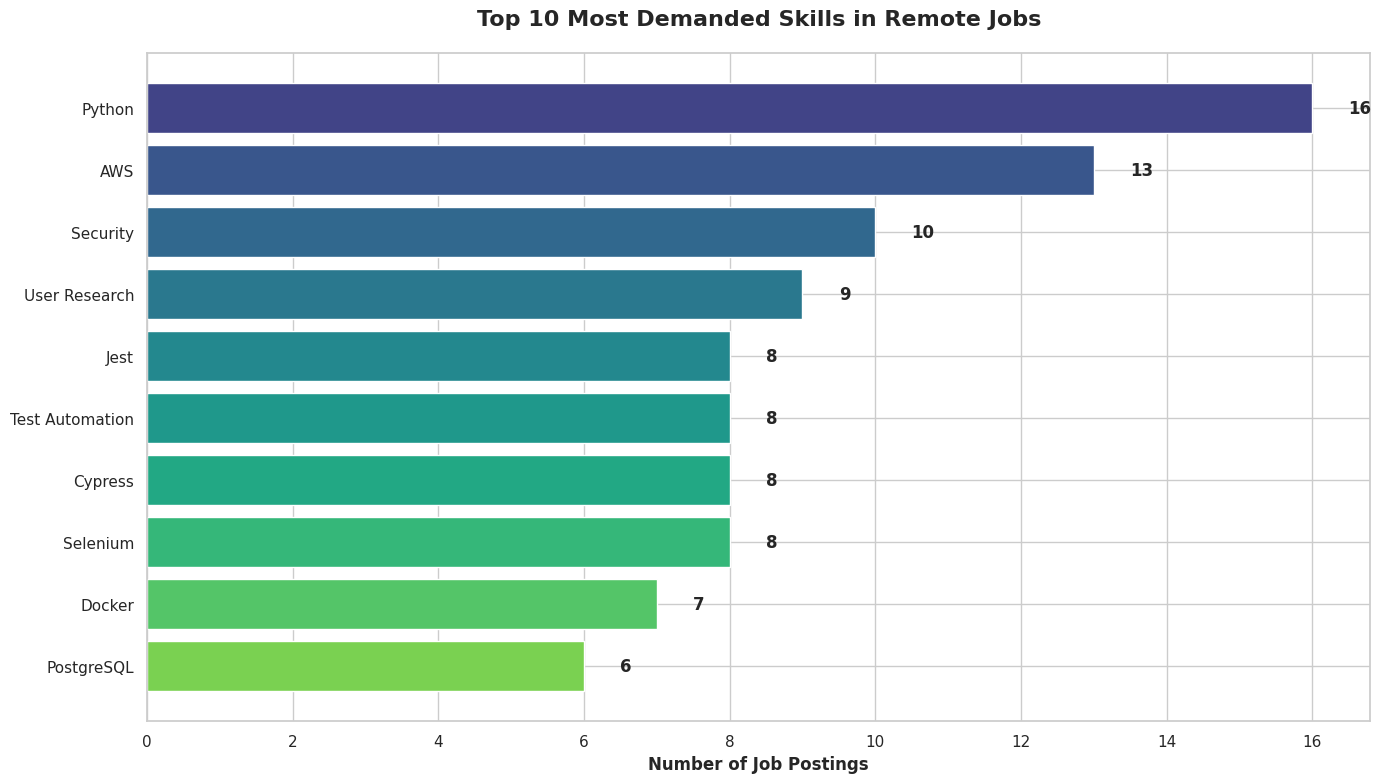

✅ Visualization 1 saved as 'visualizations/top_skills.png'

📊 Top Skills Summary:
  Python: 16 postings (32.0%)
  AWS: 13 postings (26.0%)
  Security: 10 postings (20.0%)
  User Research: 9 postings (18.0%)
  Jest: 8 postings (16.0%)
  Test Automation: 8 postings (16.0%)
  Cypress: 8 postings (16.0%)
  Selenium: 8 postings (16.0%)
  Docker: 7 postings (14.0%)
  PostgreSQL: 6 postings (12.0%)


In [63]:
#Visualization 1: Top 10 Skills Demand

print("\n" + "="*60)
print("VISUALIZATION 1: TOP 10 SKILLS DEMAND")
print("="*60)

# Calculate top skills
top_skills = df_skills_exploded['skills_list'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(top_skills)), top_skills.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_skills))))
plt.yticks(range(len(top_skills)), top_skills.index)
plt.xlabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Demanded Skills in Remote Jobs', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(top_skills.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visualizations/top_skills.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 1 saved as 'visualizations/top_skills.png'")
print(f"\n📊 Top Skills Summary:")
for skill, count in top_skills.items():
    print(f"  {skill}: {count} postings ({count/len(df)*100:.1f}%)")


VISUALIZATION 2: JOB TYPE DISTRIBUTION


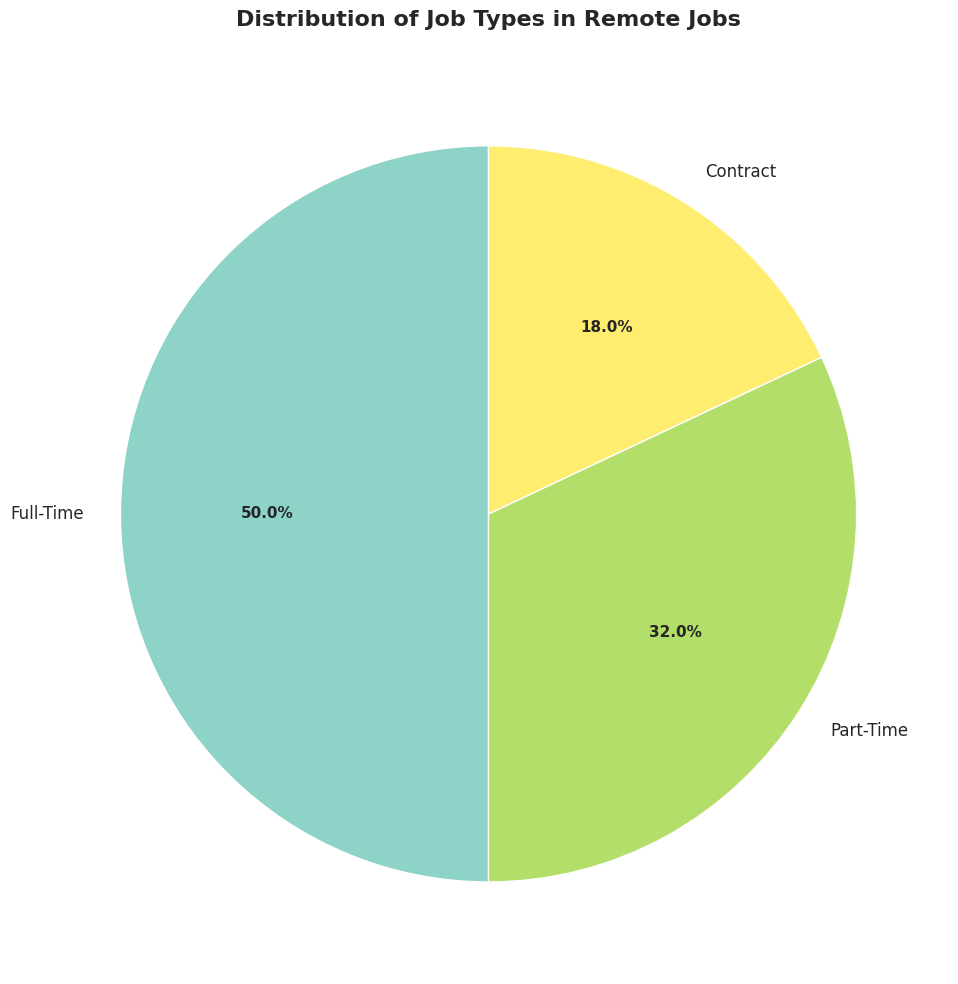

✅ Visualization 2 saved as 'visualizations/job_type_distribution.png'

📊 Job Type Breakdown:
  Full-Time: 25 postings (50.0%)
  Part-Time: 16 postings (32.0%)
  Contract: 9 postings (18.0%)


In [64]:
#Visualization 2: Job Type Distribution

print("\n" + "="*60)
print("VISUALIZATION 2: JOB TYPE DISTRIBUTION")
print("="*60)

# Calculate job type distribution
job_type_counts = df['job_type'].value_counts()

plt.figure(figsize=(12, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(job_type_counts)))
wedges, texts, autotexts = plt.pie(job_type_counts.values, labels=job_type_counts.index, 
                                    autopct='%1.1f%%', startangle=90, colors=colors,
                                    textprops={'fontsize': 12})

plt.title('Distribution of Job Types in Remote Jobs', fontsize=16, fontweight='bold', pad=20)

# Make percentages bold
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.savefig('visualizations/job_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 2 saved as 'visualizations/job_type_distribution.png'")
print(f"\n📊 Job Type Breakdown:")
for job_type, count in job_type_counts.items():
    print(f"  {job_type}: {count} postings ({count/len(df)*100:.1f}%)")


VISUALIZATION 3: TOP 10 JOB TITLES


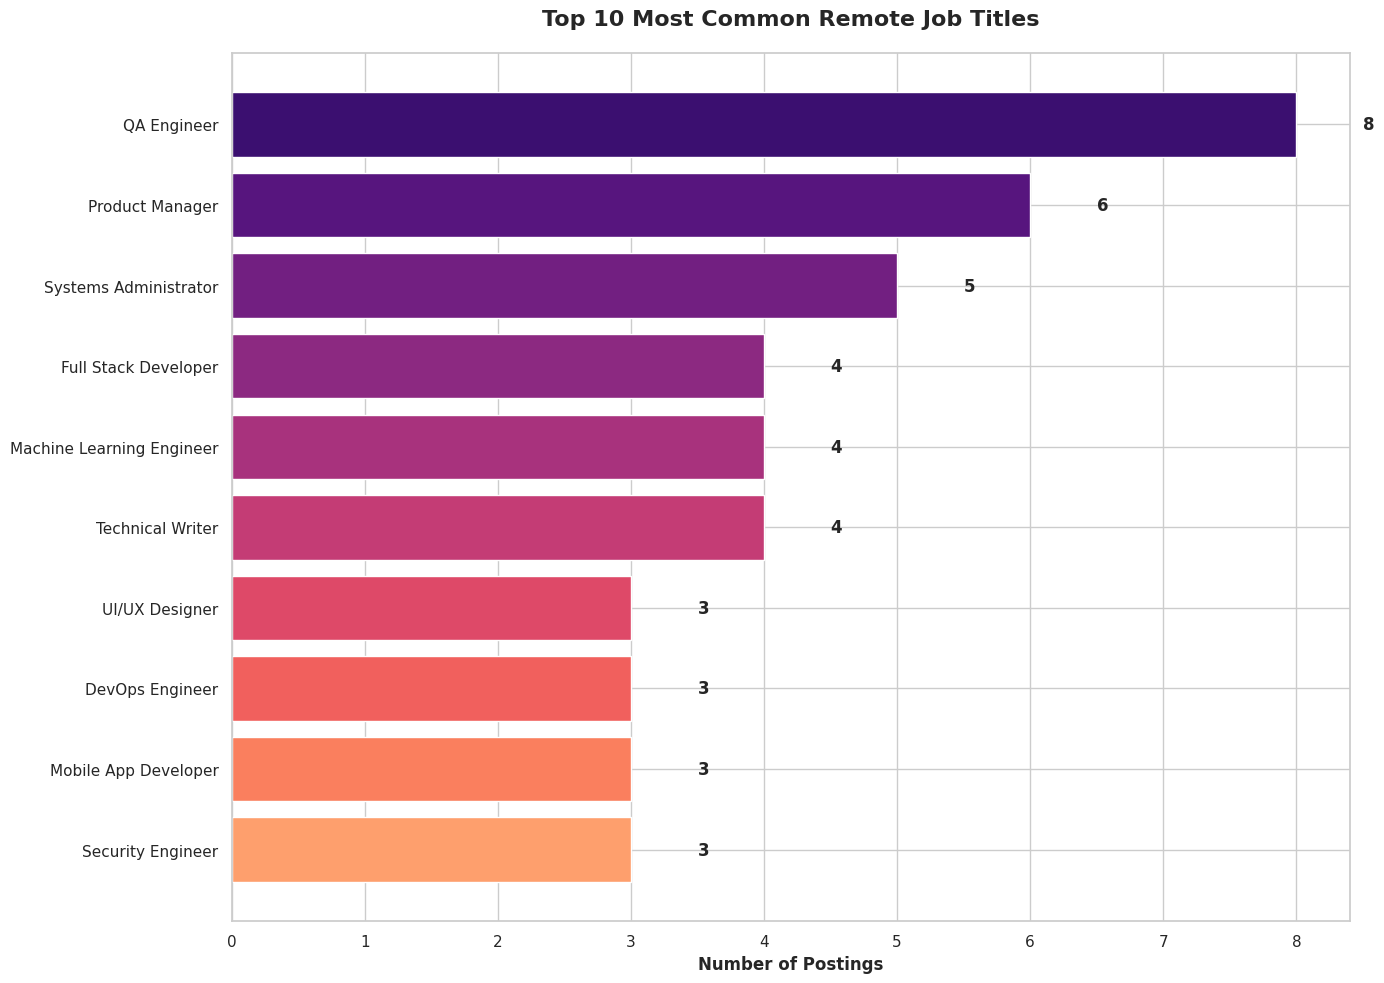

✅ Visualization 3 saved as 'visualizations/top_job_titles.png'

📊 Top Job Titles Summary:
  QA Engineer: 8 postings
  Product Manager: 6 postings
  Systems Administrator: 5 postings
  Full Stack Developer: 4 postings
  Machine Learning Engineer: 4 postings
  Technical Writer: 4 postings
  UI/UX Designer: 3 postings
  DevOps Engineer: 3 postings
  Mobile App Developer: 3 postings
  Security Engineer: 3 postings


In [65]:
#Visualization 3: Top 10 Job Titles

print("\n" + "="*60)
print("VISUALIZATION 3: TOP 10 JOB TITLES")
print("="*60)

# Calculate top job titles
top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(14, 10))
bars = plt.barh(range(len(top_titles)), top_titles.values, 
                color=plt.cm.magma(np.linspace(0.2, 0.8, len(top_titles))))
plt.yticks(range(len(top_titles)), top_titles.index, fontsize=11)
plt.xlabel('Number of Postings', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Common Remote Job Titles', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(top_titles.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visualizations/top_job_titles.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 3 saved as 'visualizations/top_job_titles.png'")
print(f"\n📊 Top Job Titles Summary:")
for title, count in top_titles.items():
    print(f"  {title}: {count} postings")


VISUALIZATION 4: TOP 15 SKILLS FREQUENCY


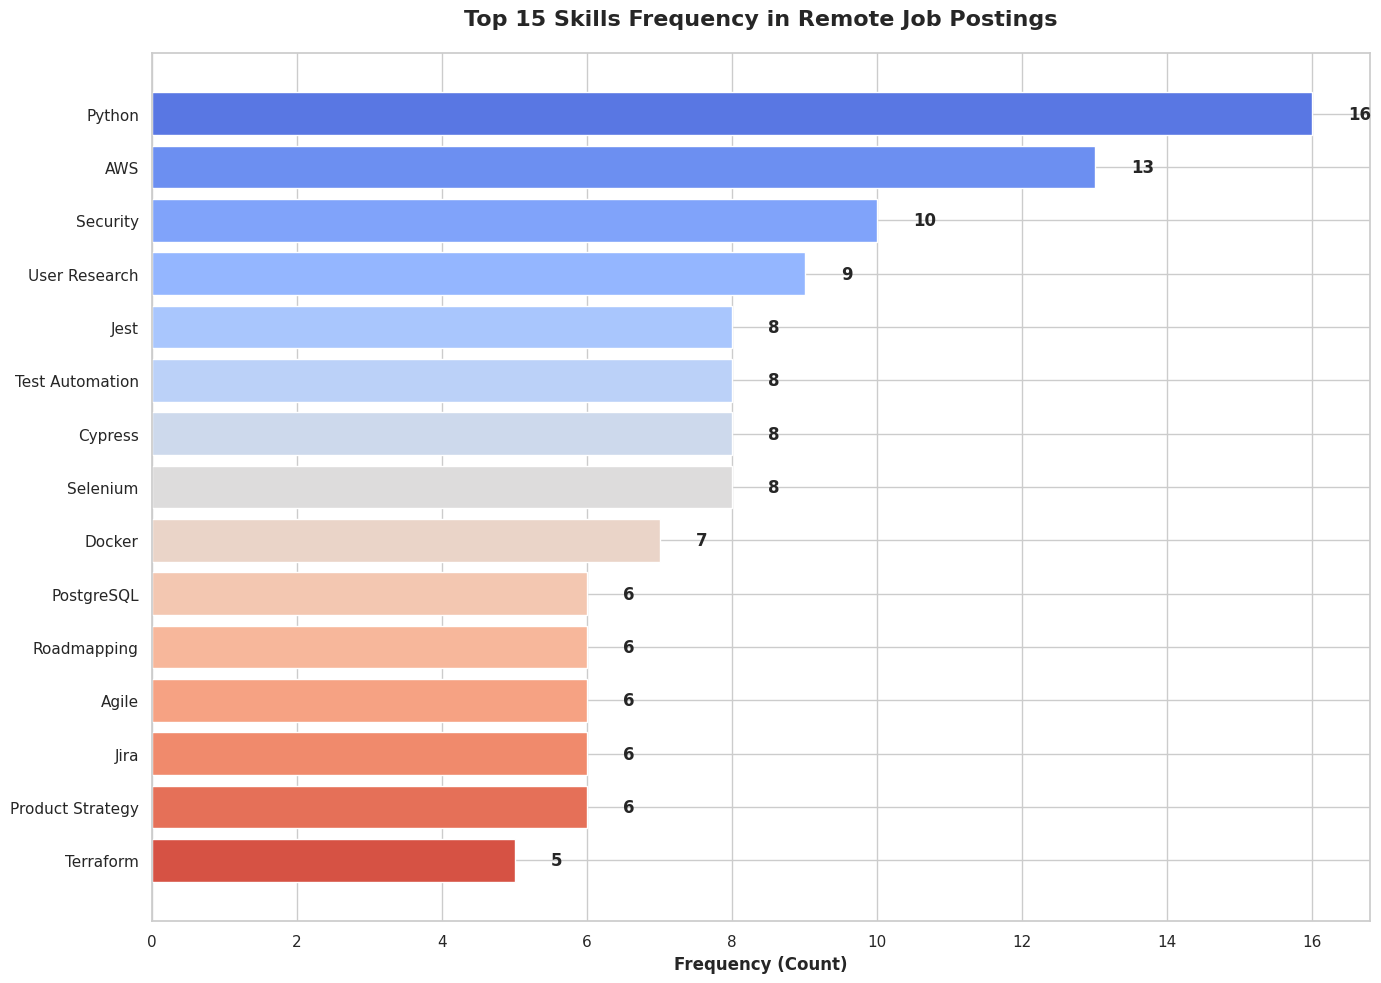

✅ Visualization 4 saved as 'visualizations/skill_frequency_comparison.png'


In [66]:
#Visualization 4: Top 15 skills frequency

print("\n" + "="*60)
print("VISUALIZATION 4: TOP 15 SKILLS FREQUENCY")
print("="*60)

# Calculate top 15 skills
top_skills_extended = df_skills_exploded['skills_list'].value_counts().head(15)

plt.figure(figsize=(14, 10))
bars = plt.barh(range(len(top_skills_extended)), top_skills_extended.values,
                color=plt.cm.coolwarm(np.linspace(0.1, 0.9, len(top_skills_extended))))
plt.yticks(range(len(top_skills_extended)), top_skills_extended.index, fontsize=11)
plt.xlabel('Frequency (Count)', fontsize=12, fontweight='bold')
plt.title('Top 15 Skills Frequency in Remote Job Postings', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(top_skills_extended.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visualizations/skill_frequency_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 4 saved as 'visualizations/skill_frequency_comparison.png'")


----------------------------------------
COMPARATIVE ANALYSIS 1: CONTRACT vs FULL-TIME ROLES
----------------------------------------

📊 Full-Time Jobs Analysis (25 postings):
----------------------------------------
Top Skills for Full-Time Jobs:
  AWS: 9 postings (36.0%)
  Security: 6 postings (24.0%)
  Python: 6 postings (24.0%)
  Docker: 5 postings (20.0%)
  User Research: 5 postings (20.0%)
  Jira: 4 postings (16.0%)
  Agile: 4 postings (16.0%)
  Roadmapping: 4 postings (16.0%)
  Product Strategy: 4 postings (16.0%)
  Terraform: 4 postings (16.0%)

📊 Contract Jobs Analysis (9 postings):
----------------------------------------
Top Skills for Contract Jobs:
  User Research: 3 postings (33.3%)
  Jira: 2 postings (22.2%)
  Python: 2 postings (22.2%)
  Agile: 2 postings (22.2%)
  Security: 2 postings (22.2%)
  Networking: 2 postings (22.2%)
  Monitoring: 2 postings (22.2%)
  Linux: 2 postings (22.2%)
  Roadmapping: 2 postings (22.2%)
  Bash: 2 postings (22.2%)


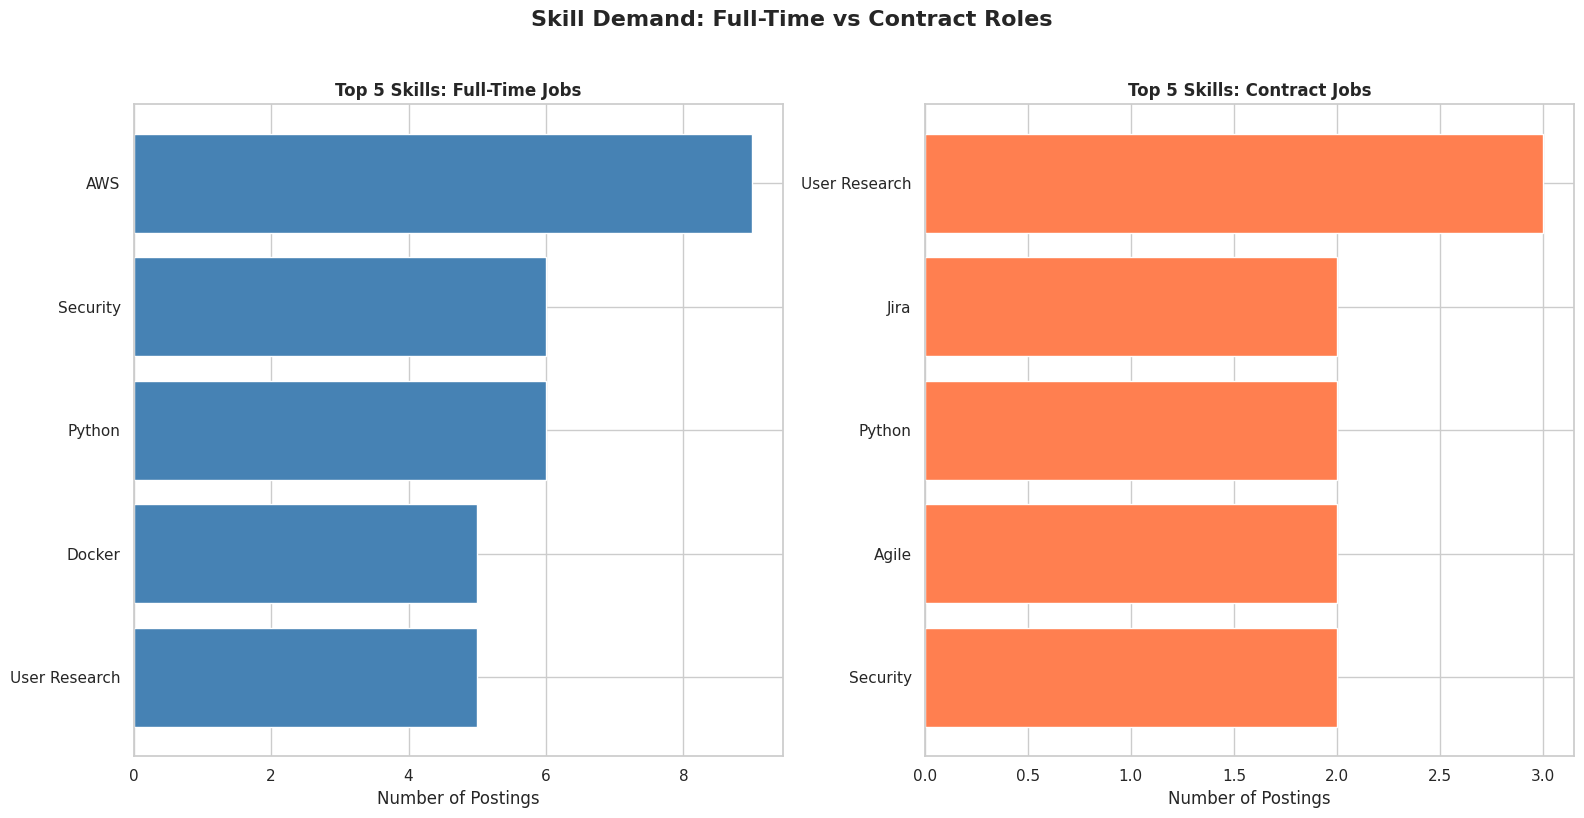


✅ Comparative visualization saved as 'visualizations/contract_vs_fulltime_skills.png'


In [67]:
#Contract Vs Full time roles analysis

print("\n" + "-"*40)
print("COMPARATIVE ANALYSIS 1: CONTRACT vs FULL-TIME ROLES")
print("-"*40)

# Filter data
full_time = df[df['job_type'] == 'Full-Time'].copy()
contract = df[df['job_type'] == 'Contract'].copy()

# Get top skills for each
top_ft_skills = get_top_skills(full_time, 10)
top_c_skills = get_top_skills(contract, 10)

print(f"\n📊 Full-Time Jobs Analysis ({len(full_time)} postings):")
print("-" * 40)
print("Top Skills for Full-Time Jobs:")
for skill, count in top_ft_skills.items():
    print(f"  {skill}: {count} postings ({count/len(full_time)*100:.1f}%)")

print(f"\n📊 Contract Jobs Analysis ({len(contract)} postings):")
print("-" * 40)
print("Top Skills for Contract Jobs:")
for skill, count in top_c_skills.items():
    print(f"  {skill}: {count} postings ({count/len(contract)*100:.1f}%)")

# Visualization: Contract vs Full-Time Skills Comparison
common_skills = set(top_ft_skills.index[:5]).union(set(top_c_skills.index[:5]))

if common_skills:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Full-Time skills
    ft_top5 = top_ft_skills.head(5)
    axes[0].barh(range(len(ft_top5)), ft_top5.values, color='steelblue')
    axes[0].set_yticks(range(len(ft_top5)))
    axes[0].set_yticklabels(ft_top5.index)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Number of Postings')
    axes[0].set_title('Top 5 Skills: Full-Time Jobs', fontweight='bold')
    
    # Contract skills
    c_top5 = top_c_skills.head(5)
    axes[1].barh(range(len(c_top5)), c_top5.values, color='coral')
    axes[1].set_yticks(range(len(c_top5)))
    axes[1].set_yticklabels(c_top5.index)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Number of Postings')
    axes[1].set_title('Top 5 Skills: Contract Jobs', fontweight='bold')
    
    plt.suptitle('Skill Demand: Full-Time vs Contract Roles', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('visualizations/contract_vs_fulltime_skills.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✅ Comparative visualization saved as 'visualizations/contract_vs_fulltime_skills.png'")


----------------------------------------
COMPARATIVE ANALYSIS 2: SKILL DEMAND ACROSS TOP TITLES
----------------------------------------

📊 Analyzing skill demand for top 3 job titles:

Job Title: 'QA Engineer' (8 postings)
Top 5 skills:
  Selenium: 8 postings (100.0%)
  Cypress: 8 postings (100.0%)
  Jest: 8 postings (100.0%)
  Python: 8 postings (100.0%)
  Test Automation: 8 postings (100.0%)

Job Title: 'Product Manager' (6 postings)
Top 5 skills:
  Agile: 6 postings (100.0%)
  Jira: 6 postings (100.0%)
  Product Strategy: 6 postings (100.0%)
  User Research: 6 postings (100.0%)
  Roadmapping: 6 postings (100.0%)

Job Title: 'Systems Administrator' (5 postings)
Top 5 skills:
  Linux: 5 postings (100.0%)
  Bash: 5 postings (100.0%)
  Networking: 5 postings (100.0%)
  Monitoring: 5 postings (100.0%)
  Security: 5 postings (100.0%)


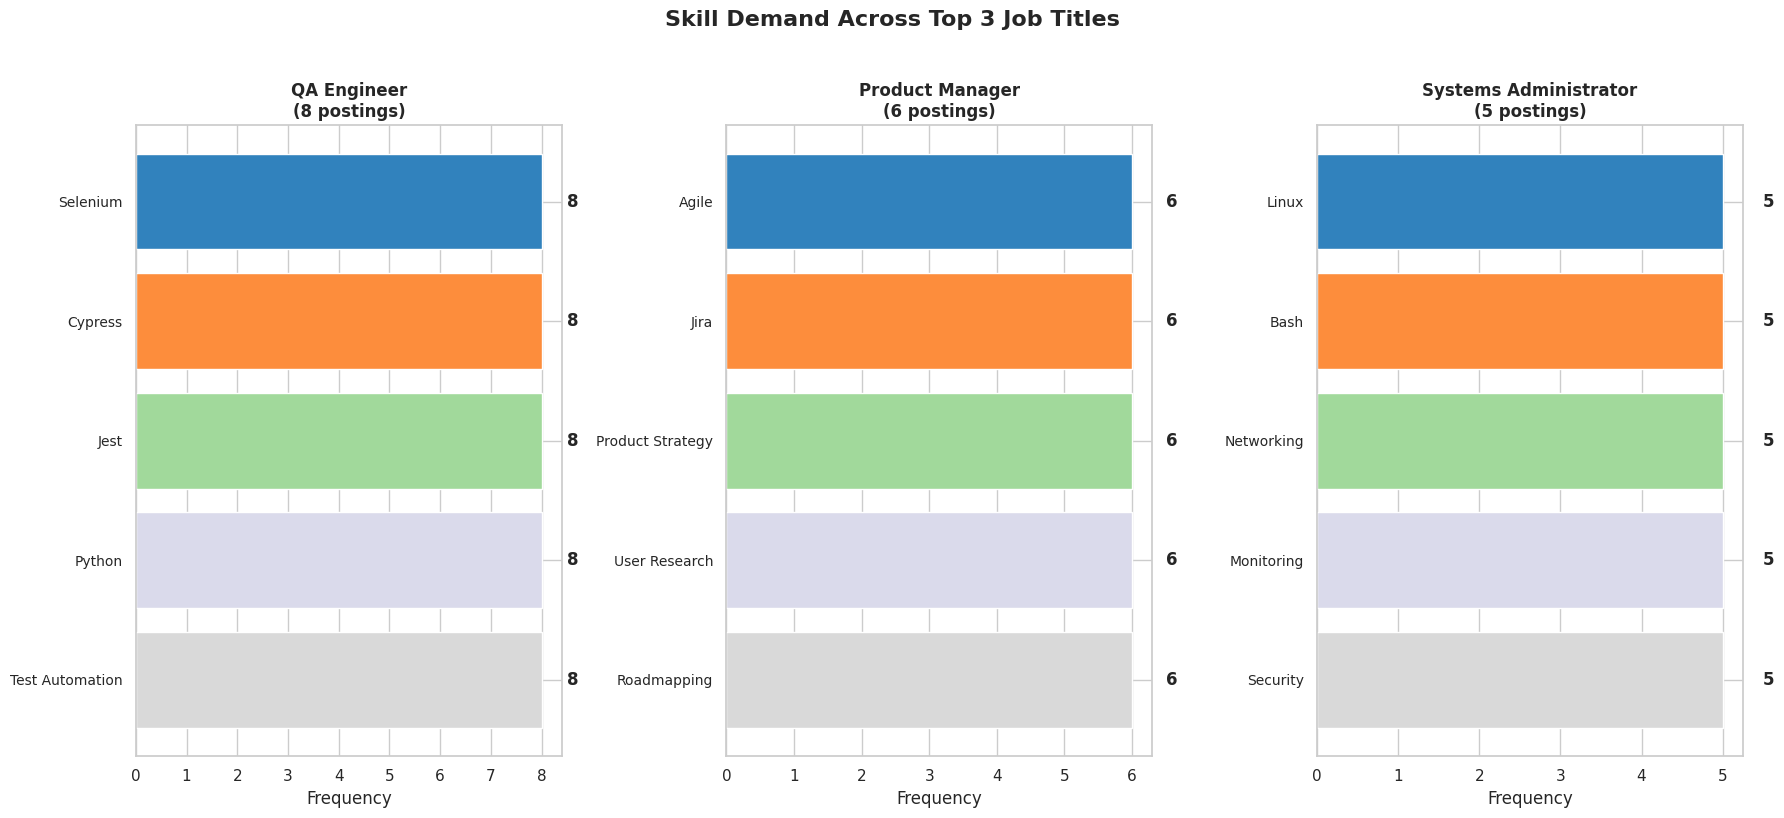


✅ Comparative visualization saved as 'visualizations/top_titles_skills.png'


In [68]:
#In demand Skills

print("\n" + "-"*40)
print("COMPARATIVE ANALYSIS 2: SKILL DEMAND ACROSS TOP TITLES")
print("-"*40)

# Get top 3 job titles
top_3_titles = df['title'].value_counts().head(3).index.tolist()
print(f"\n📊 Analyzing skill demand for top 3 job titles:")

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for idx, title in enumerate(top_3_titles):
    title_jobs = df[df['title'] == title].copy()
    title_skills = get_top_skills(title_jobs, 8)
    
    print(f"\n{'='*40}")
    print(f"Job Title: '{title}' ({len(title_jobs)} postings)")
    print(f"{'='*40}")
    print("Top 5 skills:")
    for skill, count in title_skills.head(5).items():
        print(f"  {skill}: {count} postings ({count/len(title_jobs)*100:.1f}%)")
    
    # Create subplot for each title
    colors = plt.cm.tab20c(np.linspace(0, 1, len(title_skills)))
    axes[idx].barh(range(len(title_skills)), title_skills.values, color=colors)
    axes[idx].set_yticks(range(len(title_skills)))
    axes[idx].set_yticklabels(title_skills.index, fontsize=10)
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_title(f'{title}\n({len(title_jobs)} postings)', fontweight='bold')
    
    # Add value labels
    for i, v in enumerate(title_skills.values):
        axes[idx].text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.suptitle('Skill Demand Across Top 3 Job Titles', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('visualizations/top_titles_skills.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Comparative visualization saved as 'visualizations/top_titles_skills.png'")